# In this notebook, we look at convergence and divergence of Laplace transform of several functions.

The main reference are from the official documentations here:

ref1: https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html


ref2: https://docs.sympy.org/latest/modules/integrals/integrals.html

$$L\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{d}s $$

https://sympy-plot-backends.readthedocs.io/en/latest/install.html

First, we need to install sympy_plot_backends package since Google Colab doesn't have the package preloaded by default. It can be done by using pip

In [ ]:
%pip install sympy_plot_backends[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.8/363.8 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Fo

In [ ]:
# import libraries for computing and visualization
import sympy
from spb import *
sympy.init_printing()

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Define symbols s, t, alpha, omega, and parameter a, b, n

t, s = sympy.symbols('t, s')
alpha, omega = sympy.symbols('alpha, omega')
a, n, b = sympy.symbols('a, n, b', real=True, positive=True)

## Direct evaluation

In [ ]:
# 1: 1
f = 1

# 2: exp(at)
#f = sympy.exp(a*t)

# 3: exp(-at)
# f = sympy.exp(-a*t)

# 4: t^n
# f = t**n

# 5: sin(a*t)
f = sympy.sin(a*t)

# 6: cos(a*t)
#f = sympy.cos(a*t)

# 7 exp(a*t) * sin(b*t)
#f = sympy.exp(a*t) * sympy.sin(b*t)

# 8 exp(a*t) * cos(b*t)
# f = sympy.exp(a*t) * sympy.cos(b*t)

# 9 t^n * exp(a*t)
# f = t**n * sympy.exp(a*t)


sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

⎧        1                           π
⎪    ──────────       for │arg(s)│ < ─
⎪      ⎛     2⎞                      2
⎪      ⎜    s ⎟                       
⎪    a⋅⎜1 + ──⎟                       
⎪      ⎜     2⎟                       
⎪      ⎝    a ⎠                       
⎨                                     
⎪∞                                    
⎪⌠                                    
⎪⎮  -s⋅t                              
⎪⎮ ℯ    ⋅sin(a⋅t) dt     otherwise    
⎪⌡                                    
⎪0                                    
⎩                                     

### Visualize the above function

In [ ]:
Lf = sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

## Using Built in function

`sympy` also has a built-in function for computing the Laplace transform, called `laplace_transform`. It returns the Laplace transform of the input function, and the domain (in $s$) where the improper integral converges.

### Example: the function $\sin(at)$ has a Laplace transform

In [ ]:
# define the function
f1 = sympy.sin(a * t)

In [ ]:
# compute the Laplace transform of f1
sympy.laplace_transform(f1,t,s)

⎛  1            ⎞
⎜──────, 0, True⎟
⎜ 2             ⎟
⎝s  + 1         ⎠

In [ ]:
Lf1 = sympy.laplace_transform(f1,t,s)

## Visualization with Plot3D and Plot Contour:

First, make sure to install the sympy-plot-backends pip packages. Google Colab doesn't have it installed by default.

Install sympy_plot_backend: https://sympy-plot-backends.readthedocs.io/en/latest/install.html

https://stackoverflow.com/questions/77045231/how-to-plot-surface-plot-3-d-laplace-transform-for-xt-exp-tsint-with-s

We can 3d plot the $e^{-t}*sint$

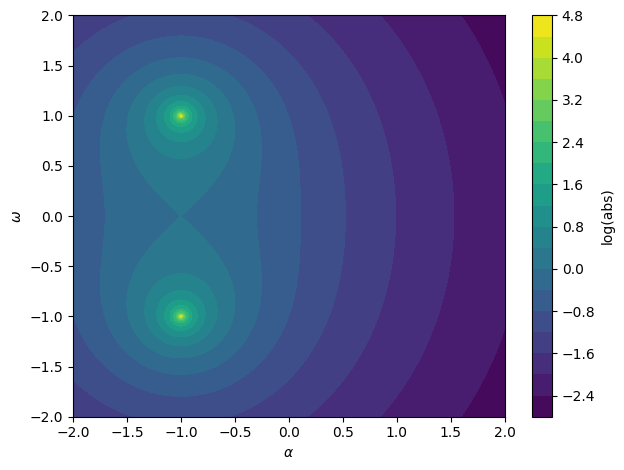

In [ ]:
expr = sympy.exp(-t) * sympy.sin(t)
res = sympy.laplace_transform(expr, t, s, noconds=True)

colorscale = [
    [0, 'green'],
    [0.01, 'orange'],
    [0.05, 'red'],
    [1, 'red']
]

plot3d(
    abs(res.subs(s, alpha + sympy.I * omega)), (alpha, -2, 2), (omega, -2, 2), {"colorscale": colorscale},
    backend=PB, size=(600, 600), zlim=(0, 10),
    use_cm=True, colorbar=False, wireframe=True, zlabel="Abs"
)
plot_contour(
    sympy.log(abs(res.subs(s, alpha + sympy.I * omega))), (alpha, -2, 2), (omega, -2, 2),
    "log(abs)", {"levels": 20},
    grid=False, n=300)

### Example: the function $e^{t^2}$ does not have a Laplace transform

In [ ]:
f2 = sympy.exp(t**2)

The result does not return a function in $s$ explicitly, indicating that there is no Laplace transform.

In [ ]:
# compute the Laplace transform of f2
sympy.laplace_transform(f2,t,s)

⎛                ⎛ ⎛ 2⎞      ⎞          ⎞
⎜                ⎜ ⎝t ⎠      ⎟          ⎟
⎝LaplaceTransform⎝ℯ    , t, s⎠, -∞, True⎠